## Short Exercises

Using the four methods we have presented in this chapter to compute the solution to the following problems using the step sizes $\Delta t = 0.5, 0.1, 0.05, 0.01$. Give an explanation for the behavior of each solution.

- $y'(t) = -\left[y(t)\right]^2$ for $t \in [1,10]$, and $y(1) = \frac{1}{2}$. The solution to this problem is $y(t) = 1/(t+1)$. {\em Hint: You can make the substitution $\hat t = t -1 $ and reformulate the initial condition in terms of $\hat t = 0$.}
- $y'(t) = \sin(t)/t$ for $t \in [0,10]$, and $y(0) = 0$. The solution to this problem is $y(t) = \mathrm{Si}(t),$ where $\mathrm{Si}(t)$ is the Sine integral function. 
- $y''(t) = (t-20) y$ for $t\in[0,24]$ and $y(0) = -0.176406127078$ and $y'(0)= 0.892862856736$. The true solution to this problem is $y(t) = \mathrm{Ai}(t-20),$ where $\mathrm{Ai}(t)$ is the Airy function. 

## solution

The file $\texttt{ch17.py}$ is imported that contains all of the functions in the Chapter 17 notes. It is also acceptable to paste the specific functions needed.

$y'(t) = -\left[y(t)\right]^2$ for $t \in [1,10]$, and $y(1) = \frac{1}{2}$

$\br$We will make the substitution for $\hat{t} = t - 1$, which leads to the following

$$y'(\hat{t}) = -[y(\hat{t})]^2,~y(\hat{t} = 0) = \frac{1}{2},~\text{and}~\hat{t} \in [0,9].$$

$\br$We will solve the above for $\hat{t}$ and then make the substitution again for $t = \hat{t} + 1$.

$\br$The necessary functions and constants are defined such that they can be input into the functions from the lecture notes. A $\texttt{for}$ loop is used to loop through each time step, and then the solution from each method is plotted.$\br$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ch17 import * 
%matplotlib inline

# Define given values
RHS = lambda y,t: -y**2
dts = np.array([0.5,0.1,0.05,0.01])
tf = 10
y0 = 0.5

# For exact solution
t = np.linspace(1,tf,50)
exact = lambda t: 1/(t+1)

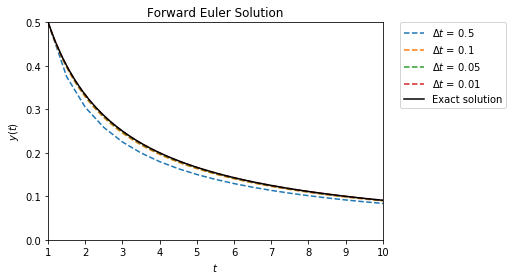

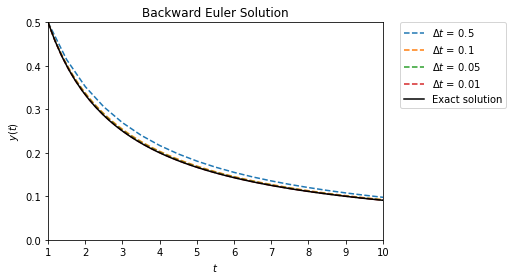

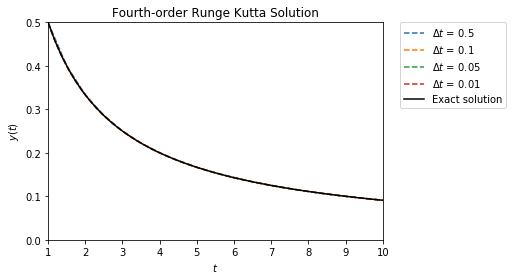

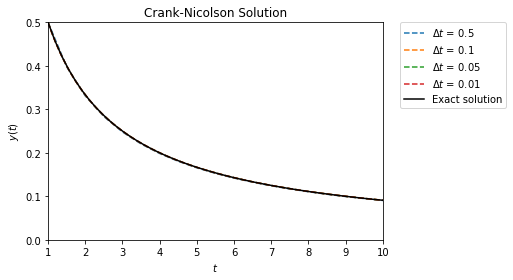

In [3]:
# Forward Euler
for dt in dts:
    that,y = forward_euler(RHS,y0,dt,tf/dt)
    plt.plot(that+1,y,'--',label="$\Delta t$ = " + str(dt))
plt.plot(t,exact(t),label="Exact solution",color="black")
plt.title('Forward Euler Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.axis((1,10,0,0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Backward Euler
for dt in dts:
    that,y = backward_euler(RHS,y0,dt,tf/dt)
    plt.plot(that+1,y,'--',label="$\Delta t$ = " + str(dt))
plt.plot(t,exact(t),label="Exact solution",color="black")
plt.title('Backward Euler Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.axis((1,10,0,0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Fourth-order Runge Kutta
for dt in dts:
    that,y = RK4(RHS,y0,dt,tf/dt)
    plt.plot(that+1,y,'--',label="$\Delta t$ = " + str(dt))
plt.plot(t,exact(t),label="Exact solution",color="black")
plt.title('Fourth-order Runge Kutta Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.axis((1,10,0,0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Crank-Nicolson
for dt in dts:
    that,y = crank_nicolson(RHS,y0,dt,tf/dt)
    plt.plot(that+1,y,'--',label="$\Delta t$ = " + str(dt))
plt.plot(t,exact(t),label="Exact solution",color="black")
plt.title('Crank-Nicolson Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.axis((1,10,0,0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

$y'(t) = \sin(t)/t$ for $t \in [0,10]$, and $y(0) = 0$

$\br$The necessary functions and constants are defined such that they can be input into the functions from the lecture notes. A $\texttt{for}$ loop is used to loop through each time step, and then the solution from each method is plotted. The function $\texttt{sici}$ is imported from the SciPy library $\texttt{special}$ in order to evaluate the sine integral function in the exact solution.$\br$

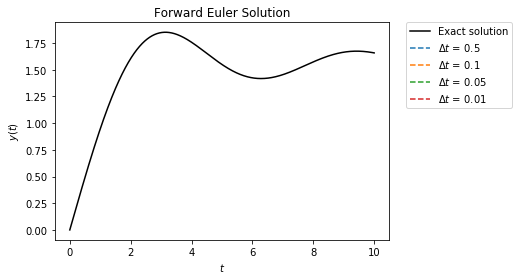

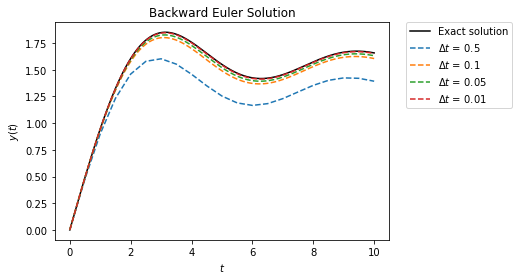

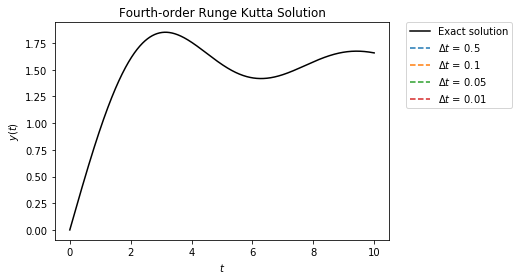

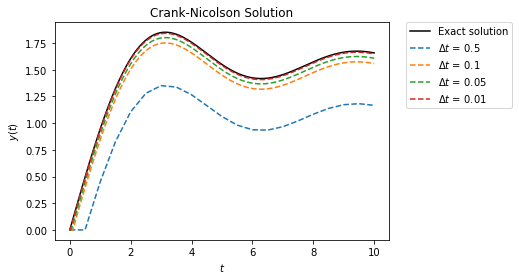

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ch17 import *

# For sine integral function
from scipy.special import sici

# Ignore the small number to zero error
import warnings
warnings.filterwarnings("ignore")

# Define given values
RHS = lambda y,t: np.sin(t)/t
dts = np.array([0.5,0.1,0.05,0.01])
tf = 10
y0 = 0.0

# For exact solution
t = np.linspace(0,tf,1000)
exact = lambda t: sici(t)[0]

# Forward Euler
plt.plot(t,exact(t),label="Exact solution",color="black")
for dt in dts:
    t,y = forward_euler(RHS,y0,dt,tf/dt)
    plt.plot(t,y,'--',label="$\Delta t$ = " + str(dt))
plt.title('Forward Euler Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Backward Euler
plt.plot(t,exact(t),label="Exact solution",color="black")
for dt in dts:
    t,y = backward_euler(RHS,y0,dt,tf/dt)
    plt.plot(t,y,'--',label="$\Delta t$ = " + str(dt))
plt.title('Backward Euler Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Fourth-order Runge Kutta
plt.plot(t,exact(t),label="Exact solution",color="black")
for dt in dts:
    t,y = RK4(RHS,y0,dt,tf/dt)
    plt.plot(t,y,'--',label="$\Delta t$ = " + str(dt))
plt.title('Fourth-order Runge Kutta Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Crank-Nicolson
plt.plot(t,exact(t),label="Exact solution",color="black")
for dt in dts:
    t,y = crank_nicolson(RHS,y0,dt,tf/dt)
    plt.plot(t,y,'--',label="$\Delta t$ = " + str(dt))
plt.title('Crank-Nicolson Solution')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


$y''(t) = (t-20) y$ for $t\in[0,24]$ and $y(0) = -0.176406127078$ and $y'(0)= 0.892862856736$

$\br$We can write this as a system using the definition

$$u(t) = y'(t),$$

to get

$$u'(t) = (t-20) y,$$

therefore

$$\frac{d}{dt}
\begin{pmatrix}
u \\
y 
\end{pmatrix} =
\begin{pmatrix}
0 & t-20 \\
1 & 0 
\end{pmatrix}
\begin{pmatrix}
u \\
y 
\end{pmatrix}.$$

The necessary functions and constants are defined such that they can be input into the functions from the lecture notes. A $\texttt{for}$ loop is used to loop through each time step, and then the solution from each method is plotted. The function $\texttt{airy}$ is imported from the SciPy library $\texttt{special}$ in order to evaluate the airy function in the exact solution.

$\br$The first three plots have a limit set for the y axis of $[-5,5]$, because otherwise the forward Euler solution dominates and it is not possible to see the remaining solutions.$\br$

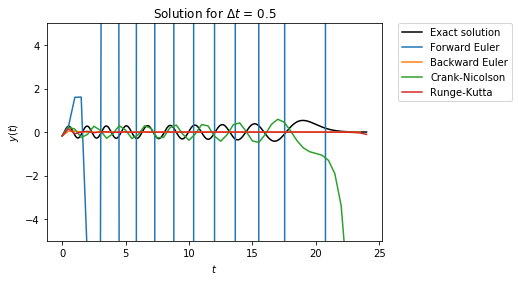

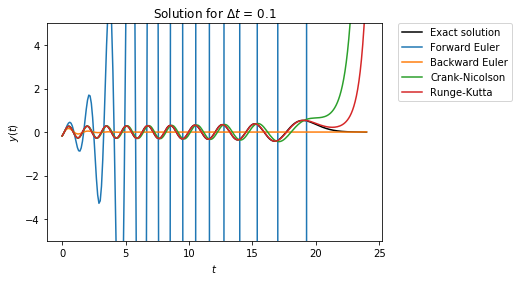

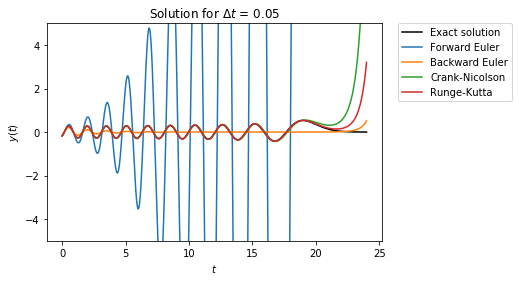

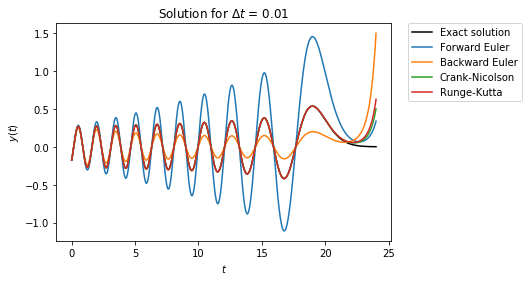

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ch17 import *

# For Airy function
from scipy.special import airy

# Define given values
A_func = lambda t: np.array([[0,(t-20)],[1,0]])
c = lambda t: np.zeros(2)
exact = lambda t: airy(t-20)[0]
IC = np.array([0.892862856736,-0.176406127078])
dts = np.array([0.5,0.1,0.05,0.01])
tf = 24

# Loop through each time step and plot
for dt in dts:
    # Solve for each method
    tFE,yFE = forward_euler_system(A_func,c,IC,dt,tf/dt)
    tBE,yBE = backward_euler_system(A_func,c,IC,dt,tf/dt)
    tCN,yCN = cn_system(A_func,c,IC,dt,tf/dt)
    tRK,yRK = RK4_system(A_func,c,IC,dt,tf/dt)
    # Plot each method
    t = np.linspace(0,tf,1000)
    plt.plot(t,exact(t),label="Exact solution",color="black")
    plt.plot(tFE,yFE[1],label="Forward Euler")
    plt.plot(tBE,yBE[1],label="Backward Euler")
    plt.plot(tCN,yCN[1],label="Crank-Nicolson")
    plt.plot(tRK,yRK[1],label="Runge-Kutta")
    # Make them plots look good
    plt.title("Solution for $\Delta t$ = " + str(dt))
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # Get rid of forward Euler doing a bad job, first 3 plots
    if dt > 0.01:
        plt.ylim([-5,5])
    plt.show()

## Point Reactor Kinetics

Assume one group of delayed neutrons and an initially critical reactor with no extraneous source. The point reactor kinetics equations  under these assumptions are:

$$\frac{dP}{dt} = \frac{\rho - \beta}{\Lambda}P + \lambda C,$$

$$\frac{dC}{dt} = \frac{ \beta}{\Lambda}P - \lambda C,$$

with initial conditions: $P(0) = P_0$ and $C(0) = C_0 = \frac{\beta P_0}{\lambda \Lambda}$. Other useful values are $\beta = 750$ pcm, $\Lambda = 2 \times 10^{-5}$ s, $\lambda = 10^{-1}$ s$^{-1}$. 

$\br$At time $t=0$ a control rod is instantaneously withdrawn and the inserted reactivity is $\rho = 50$ pcm $=50 \times 10^{-5}$.  Write a $\texttt{Python}$ code to solve the PRKEs.  Do not assume that reactivity is a constant, rather allow it to be a function of $t$ so that you can do a ramp or sinusoidal reactivity. 

$\br$Your code will utilize the following methods


- Forward Euler
- Backward Euler
- Fourth-order Runge Kutta
- Crank-Nicolson

For each method provide plots for $t = 0 \dots 5$ s using $\Delta t = \{ 1, 3, 5, 6 \}$ ms. Provide 9 plots:

- One plot with all the methods per time step size (5 plots total)
- One plot with all time step sizes per method.

Make the axes reasonable---if a method diverges don't have the scale go to $\pm\infty$.

$\br$Comment your results and explain their behavior. Stating that a method converges or not is not an explanation, it is only a comment/observation. The explanation should include justifications for convergence/divergence or the presence of oscillations. To answer these questions you should look at the analytical solutions of the equations.

## Solution

We can arrange the system of equations above in the form

$$\textbf{Y}'(t) = \textbf{A}(t)\textbf{Y} + \textbf{c},~~~~~~\textbf{Y}(0) = \textbf{y}_0,$$

where

$$\textbf{A} = \begin{pmatrix}
\frac{\rho - \beta}{\Lambda} & \lambda \\
\frac{\beta}{\Lambda} & -\lambda \\
\end{pmatrix},$$

$$\textbf{c} = \begin{pmatrix}
0 \\
0 \\
\end{pmatrix},$$

and

$$\textbf{y}_0 = \begin{pmatrix}
1 \\
\frac{\beta}{\lambda \Lambda} \\
\end{pmatrix}.$$

$\br$These matricies and functions are inputted into python for solving using the various methods in Chapter 17. The file $\texttt{ch17.py}$ contains all of the functions in the Chapter 17 lecture notes, and is imported. It is also acceptable to paste the functions.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ch17 import *

# Define A
beta = 750.0E-5
Lamb = 2.0E-5 # [sec]
lamb = 1.0E-1 # [1/sec]
rho = 50.0E-5
A = lambda t: np.array([((rho-beta)/Lamb,lamb),
                         (beta/Lamb,-lamb)])
# Define c
c = lambda t: np.zeros(2)

# Define initial vector
y0 = np.array([1,beta/(lamb*Lamb)])

# Define time related constants
tFinal = 5.0
dts = np.array([1,3,5,6])*1.0E-3

$\textbf{Note:}$ For all of the solutions below, the delayed neutrons are normalized to the power, in order to see them on the same plot. This is not required and allows for an easier view of both of the solutions together.

The system is solved using the method of forward Euler at each time step, and plotted accordingly.$\br$

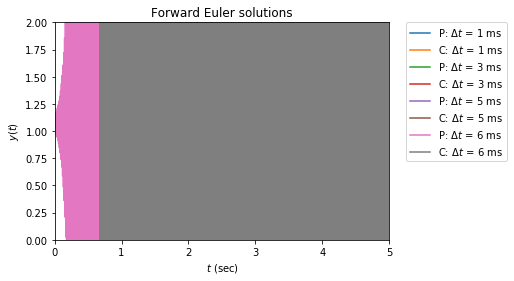

In [10]:
# Forward Euler
for dt in dts:
    t,y = forward_euler_system(A,c,y0,dt,tFinal/dt)
    plt.plot(t,y[0,:],label="P: $\Delta t$ = " + str(int(dt*10**3)) + " ms")
    plt.plot(t,y[1,:],label="C: $\Delta t$ = " + str(int(dt*10**3)) + " ms")
plt.axis([0,5,0,2])
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Forward Euler solutions")
plt.show()

Above we see that forward Euler is unstable. This is a result of the PRKEs: the rapid increase in power is too fast for forward Euler to handle, and this leads to the instability we see.

The system is then solved using the method of backward Euler at each time step, and plotted accordingly.$\br$

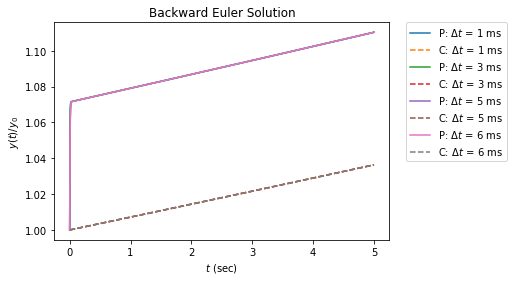

In [11]:
# Backward Euler
for dt in dts:
    t,y = backward_euler_system(A,c,y0,dt,tFinal/dt)
    plt.plot(t,y[0,:],label="P: $\Delta t$ = "+str(int(dt*10**3))+" ms")
    plt.plot(t,y[1,:]/y0[1],'--',label="C: $\Delta t$ = "+str(int(dt*10**3))+" ms")
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)/y_0$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Backward Euler Solution")
plt.show()

The system is then solved using the Crank-Nicolson method at each time step, and plotted accordingly.$\br$

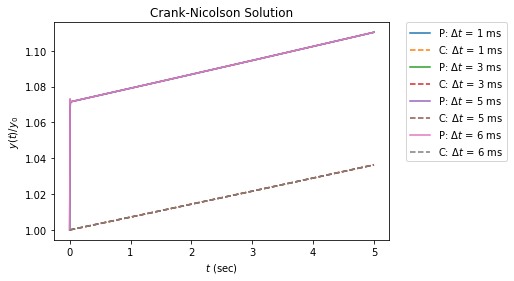

In [12]:
# Crank-Nicolson
for dt in dts:
    t,y = cn_system(A,c,y0,dt,tFinal/dt)
    plt.plot(t,y[0,:],label="P: $\Delta t$ = "+str(int(dt*10**3))+" ms")
    plt.plot(t,y[1,:]/y0[1],'--',label="C: $\Delta t$ = "+str(int(dt*10**3))+" ms")
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)/y_0$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Crank-Nicolson Solution")
plt.show()

For $\Delta t = 6$ ms, the Crank-Nicolson solution briefly overshoots the prompt jump.

The system is then solved using the fourth-order Runge-Kutta method at each time step, and plotted accordingly.$\br$

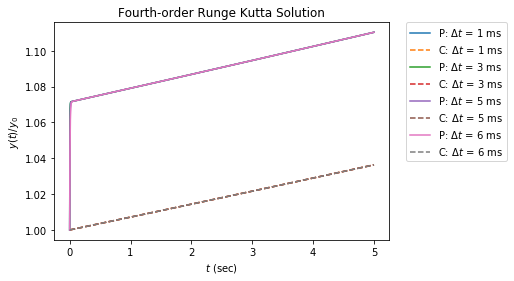

In [13]:
# RK4
for dt in dts:
    t,y = RK4_system(A,c, y0, dt, tFinal/dt)
    plt.plot(t,y[0,:],label="P: $\Delta t$ = "+str(int(dt*10**3))+" ms")
    plt.plot(t,y[1,:]/y0[1],'--',label="C: $\Delta t$ = "+str(int(dt*10**3))+" ms")
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)/y_0$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Fourth-order Runge Kutta Solution")
plt.show()


$\br$All of the methods other than forward Euler have simiilar results: they are stable and have the same result after the prompt jump.

Next, we will look at the solutions for each time step with a logarithmic scale on the x-axis to better show the difference between methods. This has the effect of zooming in on the prompt jump, but it is not required for full credit. We will use a $\texttt{for}$ loop to loop through each time step and plot the resulting solution for each method. We will not plot the forward Euler solution due to its instability.$\br$

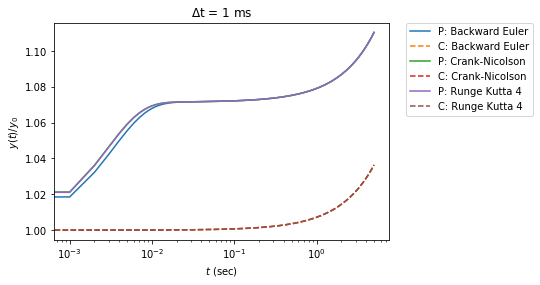

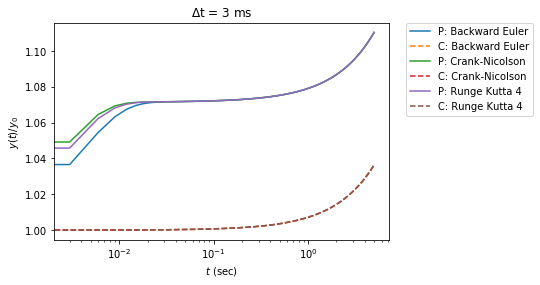

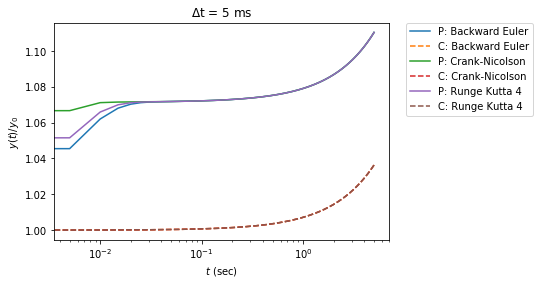

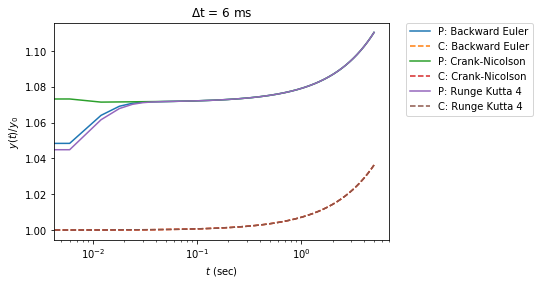

In [15]:
# Loop through dts
for dt in dts:
    # Backward Euler
    t,y = backward_euler_system(A,c, y0, dt, tFinal/dt)
    plt.plot(t,y[0,:],'-',label="P: Backward Euler")
    plt.semilogx(t,y[1,:]/y0[1],'--',label="C: Backward Euler")
    # Crank-Nicolson
    t,y = cn_system(A,c, y0, dt, tFinal/dt)
    plt.plot(t,y[0,:],'-',label="P: Crank-Nicolson")
    plt.semilogx(t,y[1,:]/y0[1],'--',label="C: Crank-Nicolson")
    # Runge Kutta 4
    t,y = RK4_system(A,c, y0, dt, tFinal/dt)
    plt.plot(t,y[0,:],'-',label="P: Runge Kutta 4")
    plt.semilogx(t,y[1,:]/y0[1],'--',label="C: Runge Kutta 4")
    plt.xlabel('$t$ (sec)')
    plt.ylabel('$y(t)/y_0$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("$\Delta$t = "+str(int(dt*10**3))+" ms")
    plt.show()

From these results we can see the issue with  Crank-Nicolson and the larger time step. Additionally, we can see that backward Euler does not change much as the time step is increased. That is because backward Euler being a first-order method only has the error increase proportional to $\Delta t$. With the remaining methods, the effect is much larger because as the time step is increased the error grows at a faster rate.

### Reactivity Ramp

 A positive reactivity ramp is inserted as follows:

$$\rho(t) = \min(\rho_\mathrm{max} t, \rho_\mathrm{max}).$$

Pick a method and a time step size of your choice.  Solve this problem for $\rho_\mathrm{max} = 0.5 \beta$ and $\rho_\mathrm{max} = 1.1\beta$.

$\br$Explain your choice and your findings.

We can arrange the necessary system of equations in the form

$$\textbf{Y}'(t) = \textbf{A}(t)\textbf{Y} + \textbf{c},~~~~~~\textbf{Y}(0) = \textbf{y}_0,$$

where

$$\textbf{A} = \begin{pmatrix}
\frac{\rho(t) - \beta}{\Lambda} & \lambda \\
\frac{\beta}{\Lambda} & -\lambda \\
\end{pmatrix},$$

$$\textbf{c} = \begin{pmatrix}
0 \\
0 \\
\end{pmatrix},$$

and

$$\textbf{y}_0 = \begin{pmatrix}
1 \\
\frac{\beta}{\lambda \Lambda} \\
\end{pmatrix}.$$

$\br$These matricies and functions are inputted into python for solving using the various methods in Chapter 17. The file $\texttt{ch17.py}$ contains all of the functions in the Chapter 17 lecture notes, and is imported. It is also acceptable to paste the functions.

$\br$The NumPy $\texttt{min}$ function will be used to determine the necessary minimum for $\rho(t)$.

$\br$Note that only the backward Euler method is used below. As long as $\Delta t$ is sufficiently small, the solutions of all of the methods will be roughly the same and will earn the appropriate credit. There still need be an appropriate reason as to why you chose a specific method.$\br$

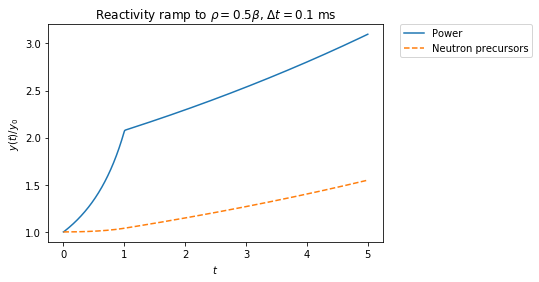

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ch17 import *

# Define A
beta = 750.0E-5
Lamb = 2.0E-5 # [sec]
lamb = 1.0E-1 # [1/sec]
rhoMax = 0.5*beta
rho = lambda t: np.min([rhoMax*t,rhoMax])
A = lambda t: np.array([((rho(t)-beta)/Lamb,lamb),
                         (beta/Lamb,-lamb)])

# Define c
c = lambda t: np.zeros(2)

# Define initial vector
y0 = np.array([1,beta/(lamb*Lamb)])

# Define time related constants
tFinal = 5.0
dt = 1.0E-4

# Backward Euler
t,y = backward_euler_system(A,c,y0,dt,tFinal/dt)
plt.plot(t,y[0,:],'-',label="Power")
plt.plot(t,y[1,:]/y0[1],'--',label="Neutron precursors")
plt.title(r'Reactivity ramp to $\rho = 0.5 \beta$, $\Delta t = 0.1$ ms')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$t$')
plt.ylabel('$y(t)/y_0$')
plt.show()

We can see the point at which the reactivity, $\rho(t)$ changes from $\rho_\mathrm{max}t$ to $\rho_\mathrm{max}$ at $t = 1$.

$\br$We will then do the same for $\rho_\mathrm{max} = 1.1 \beta$.

$\br$Note that due to the nature of the solutions, we will plot the y-axis on a log scale. We will also plot it on $[0,1.1]$ in order to better see the growth.$\br$

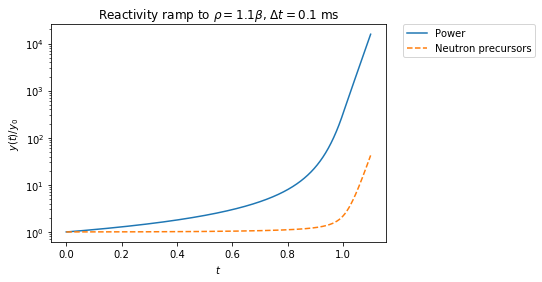

In [17]:
# Define A
beta = 750.0E-5
Lamb = 2.0E-5 # [sec]
lamb = 1.0E-1 # [1/sec]
rhoMax = 1.1*beta
rho = lambda t: np.min([rhoMax*t,rhoMax])
A = lambda t: np.array([((rho(t)-beta)/Lamb,lamb),
                         (beta/Lamb,-lamb)])

# Define c
c = lambda t: np.zeros(2)

# Define initial vector
y0 = np.array([1,beta/(lamb*Lamb)])

# Define time related constants
tFinal = 1.1
dt = 1.0E-4

# Backward Euler
t,y = backward_euler_system(A,c,y0,dt,tFinal/dt)
plt.plot(t,y[0,:],'-',label="Power")
plt.semilogy(t,y[1,:]/y0[1],'--',label="Neutron precursors")
plt.title(r'Reactivity ramp to $\rho = 1.1 \beta$, $\Delta t = 0.1$ ms')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$t$')
plt.ylabel('$y(t)/y_0$')
plt.show()

Here we see that a reactivity ramp to a reasonable (not prompt critical) reactivity has a quadratic increase followed by a close to linear increase after $\rho_\mathrm{max}$ is reached. In the case where the reactivity goes to prompt critical, we need to use a logarithmic scale to even see the increase after the prompt critical growth is reached.

### Sinusoidal Reactivity

$$\rho(t) = \rho_0 \sin(\omega t).$$

See if the reactor remains stable for any amplitude $\rho_0$ and/or frequency $\omega$.

We can arrange the necessary system of equations in the form

$$\textbf{Y}'(t) = \textbf{A}(t)\textbf{Y} + \textbf{c},~~~~~~\textbf{Y}(0) = \textbf{y}_0,$$

where

$$\textbf{A} = \begin{pmatrix}
\frac{\rho(t) - \beta}{\Lambda} & \lambda \\
\frac{\beta}{\Lambda} & -\lambda \\
\end{pmatrix},$$

$$\textbf{c} = \begin{pmatrix}
0 \\
0 \\
\end{pmatrix},$$

and

$$\textbf{y}_0 = \begin{pmatrix}
1 \\
\frac{\beta}{\lambda \Lambda} \\
\end{pmatrix}.$$

$\br$Here, we will use backward Euler to solve. However, any of the methods are acceptable other than forward Euler.

$\br$These matricies and functions are inputted into python for solving using the various methods in Chapter 17. The file $\texttt{ch17.py}$ contains all of the functions in the Chapter 17 lecture notes, and is imported. It is also acceptable to paste the functions.

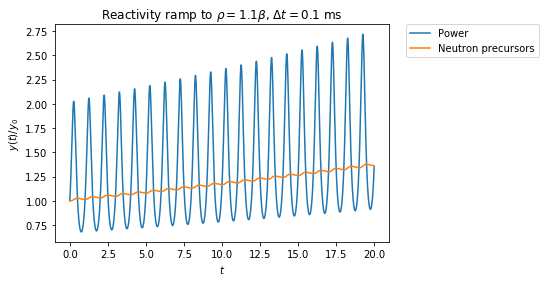

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ch17 import *

# Define A
beta = 750.0E-5
Lamb = 2.0E-5 # [sec]
lamb = 1.0E-1 # [1/sec]
rho0 = 0.5*beta
omega = 2.0*np.pi
rho = lambda t: rho0*np.sin(omega*t)
A = lambda t: np.array([((rho(t)-beta)/Lamb,lamb),
                         (beta/Lamb,-lamb)])
# Define c
c = lambda t: np.zeros(2)

# Define initial vector
y0 = np.array([1,beta/(lamb*Lamb)])

# Define time related constants
tFinal = 20.0
dt = 1.0E-4

# Backward Euler
t,y = backward_euler_system(A,c,y0,dt,tFinal/dt)
plt.plot(t,y[0,:],label="Power")
plt.plot(t,y[1,:]/y0[1],label="Neutron precursors")
plt.title(r'Reactivity ramp to $\rho = 1.1 \beta$, $\Delta t = 0.1$ ms')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$t$')
plt.ylabel('$y(t)/y_0$')
plt.show()